In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
dataset = pd.read_csv("http://www.stat.ufl.edu/~winner/data/airq402.dat", sep = "\s+", header = None)

In [3]:
dataset.describe()

,2,3,4,6,7,9,10
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,163.37542,1056.973000,672.279140,60.128590,166.64756,34.551480,143.193090
std,55.36547,643.203251,766.519254,19.367779,62.66014,27.096999,47.229184
min,50.52000,108.000000,181.410000,17.680000,50.52000,1.060000,49.610000
25%,125.97500,553.500000,257.197500,46.510000,124.08500,13.195000,113.767500
50%,161.34500,919.000000,404.780000,59.240000,161.40000,26.140000,137.825000
75%,197.39250,1452.500000,769.912500,73.510000,202.97750,52.972500,168.530000
max,401.23000,2724.000000,8950.760000,100.000000,490.03000,100.000000,387.940000


In [4]:
dataset.dtypes

0      object
1      object
2     float64
3       int64
4     float64
5      object
6     float64
7     float64
8      object
9     float64
10    float64
dtype: object

In [5]:
dataset.shape

(1000, 11)

In [6]:
cols = ['city1','city2','Avg fare cities','distance','Avg wkly passengers','mkt leading airlin','mkt share airline','Avg fare','low price airline','mkt share','price']
dataset.columns = cols

In [7]:
dataset

,city1,city2,Avg fare cities,distance,Avg wkly passengers,mkt leading airlin,mkt share airline,Avg fare,low price airline,mkt share,price
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42
5,ALB,FLL,135.17,1204,199.02,WN,40.68,137.97,DL,17.09,127.69
6,ALB,LAS,152.85,2237,237.17,WN,59.94,148.59,WN,59.94,148.59
7,ALB,LAX,190.73,2467,191.95,DL,17.89,205.06,US,16.59,174.00
8,ALB,MCO,129.35,1073,550.54,WN,76.84,127.69,WN,76.84,127.69
9,ALB,TPA,134.17,1130,202.93,US,35.40,132.91,DL,26.40,124.78


In [8]:
#split data to continous and catergorical 
data_cont = dataset.select_dtypes(include='number')
data_cat = dataset.select_dtypes(exclude='number')

In [9]:
print(data_cont.dtypes)
print("\n\n")
print(data_cont)

Avg fare cities        float64
distance                 int64
Avg wkly passengers    float64
mkt share airline      float64
Avg fare               float64
mkt share              float64
price                  float64
dtype: object



     Avg fare cities  distance  Avg wkly passengers  mkt share airline  \
0             114.47       528               424.56              70.19   
1             122.47       860               276.84              75.10   
2             214.42       852               215.76              78.89   
3              69.40       288               606.84              96.97   
4             158.13       723               313.04              39.79   
5             135.17      1204               199.02              40.68   
6             152.85      2237               237.17              59.94   
7             190.73      2467               191.95              17.89   
8             129.35      1073               550.54              76.84   
9             134.17      

In [10]:
print(data_cat.dtypes)
print(data_cat.columns)
print(data_cont.columns)

city1                 object
city2                 object
mkt leading airlin    object
low price airline     object
dtype: object
Index(['city1', 'city2', 'mkt leading airlin', 'low price airline'], dtype='object')
Index(['Avg fare cities', 'distance', 'Avg wkly passengers',
       'mkt share airline', 'Avg fare', 'mkt share', 'price'],
      dtype='object')


In [13]:
Q1 = data_cont.quantile(0.25)
Q3 = data_cont.quantile(0.75)
IQR = Q3 - Q1
minCap = Q1 - (1.5*IQR)
maxCap = Q3 + (1.5*IQR)
new_data_cont = data_cont.where((data_cont>=minCap)&(data_cont<=maxCap))
#drop NaN rows
# print(new_data_cont.shape)
# print(new_data_cont.isna().sum())
#new_data_cont.dropna(axis = 0, how = 'any',inplace = True)
# print(new_data_cont.shape)
# new_data_cont.fillna(new_data_cont.mean())
# print(new_data_cont.shape)
# new_data_cont=new_data_cont.replace(0, np.NaN)
new_data_cont.fillna(new_data_cont.median(),inplace=True)
# print(new_data_cont.shape)

print(new_data_cont.isna().sum())
new_data = pd.concat([new_data_cont, data_cat],axis = 1)

# print(new)

Avg fare cities        0
distance               0
Avg wkly passengers    0
mkt share airline      0
Avg fare               0
mkt share              0
price                  0
dtype: int64


In [14]:
new_data.shape

(1000, 11)

In [15]:
# replace(0, .NaN)
# new_data_cont.replace(new_data_cont.me, np.NaN)
new_data.isnull().sum()

Avg fare cities        0
distance               0
Avg wkly passengers    0
mkt share airline      0
Avg fare               0
mkt share              0
price                  0
city1                  0
city2                  0
mkt leading airlin     0
low price airline      0
dtype: int64

In [16]:
features = ['distance', 'price','Avg wkly passengers', 'mkt share', 'Avg fare']
# cols = ['Avg fare cities','distance','Avg wkly passengers','mkt leading airlin','mkt share airline','Avg fare','low price airline','mkt share','price']
# dataset.columns = cols
#Independent Variable 
Y = new_data['Avg fare cities']

#Dependent Variable 
X = new_data[features]


In [17]:
new_data.corr()

,Avg fare cities,distance,Avg wkly passengers,mkt share airline,Avg fare,mkt share,price
Avg fare cities,1.000000,0.529903,-0.162128,-0.222460,0.969764,-0.464423,0.789827
distance,0.529903,1.000000,-0.085964,-0.531406,0.497231,-0.367831,0.543406
Avg wkly passengers,-0.162128,-0.085964,1.000000,0.017679,-0.135385,0.065962,-0.167225
mkt share airline,-0.222460,-0.531406,0.017679,1.000000,-0.203298,0.306832,-0.310890
Avg fare,0.969764,0.497231,-0.135385,-0.203298,1.000000,-0.490317,0.743518
mkt share,-0.464423,-0.367831,0.065962,0.306832,-0.490317,1.000000,-0.281417
price,0.789827,0.543406,-0.167225,-0.310890,0.743518,-0.281417,1.000000


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


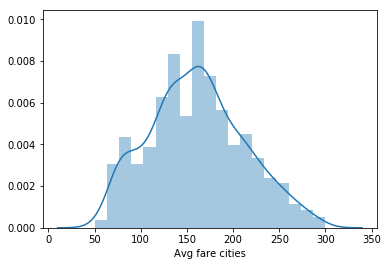

In [18]:
sns.distplot(new_data['Avg fare cities'])

In [19]:
corr_matrix=new_data.corr()
corr_matrix["Avg fare cities"].sort_values(ascending=False)

Avg fare cities        1.000000
Avg fare               0.969764
price                  0.789827
distance               0.529903
Avg wkly passengers   -0.162128
mkt share airline     -0.222460
mkt share             -0.464423
Name: Avg fare cities, dtype: float64

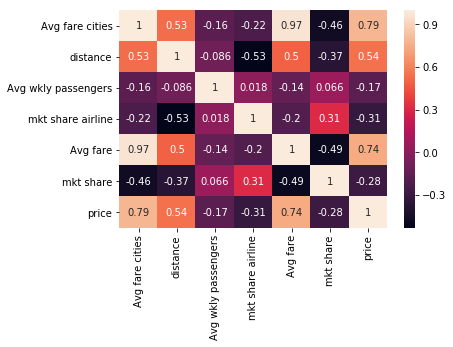

In [20]:
sns.heatmap(corr_matrix, annot=True)

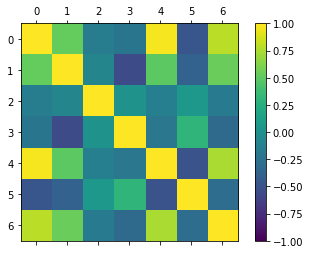

In [21]:

import matplotlib.pyplot as plt
correlations = new_data.corr()
# plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
plt.show()

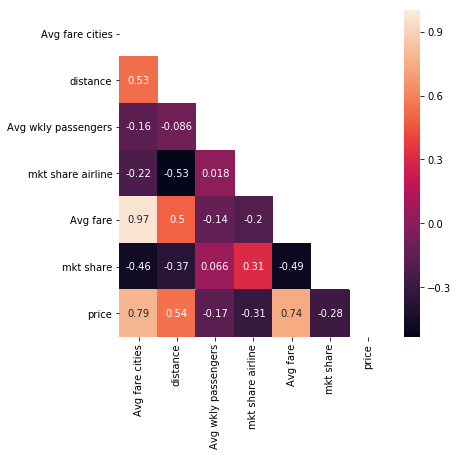

In [22]:
fig, ax = plt.subplots(figsize=(6, 6)) 
mask = np.zeros_like(new_data.corr())
mask[np.triu_indices_from(mask)] = 1
sns.heatmap(new_data.corr(), mask= mask, ax= ax, annot= True)

In [23]:
data1=new_data.drop(['Avg wkly passengers', 'mkt share'], axis=1)
data1.head()

,Avg fare cities,distance,mkt share airline,Avg fare,price,city1,city2,mkt leading airlin,low price airline
0,114.47,528,70.19,111.03,111.03,CAK,ATL,FL,FL
1,122.47,860,75.10,123.09,118.94,CAK,MCO,FL,DL
2,214.42,852,78.89,223.98,167.12,ALB,ATL,DL,CO
3,69.40,288,96.97,68.86,68.86,ALB,BWI,WN,WN
4,158.13,723,39.79,161.36,145.42,ALB,ORD,UA,WN


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


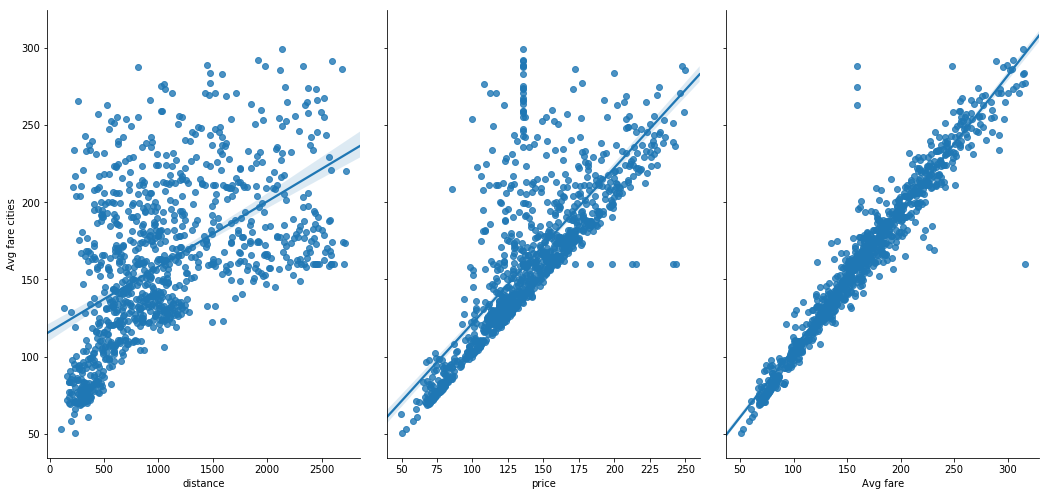

In [24]:

# cols = ['Avg fare cities','distance','Avg wkly passengers','mkt leading airlin','mkt share airline','Avg fare','low price airline','mkt share','price']
# dataset.columns = cols
sns.pairplot(data1,x_vars=['distance', 'price', 'Avg fare'],y_vars=['Avg fare cities'],kind='reg',size=7,aspect=0.7)


In [25]:
data2=data1.drop(['city1','city2','mkt leading airlin','low price airline'], axis=1)
data2.head()

,Avg fare cities,distance,mkt share airline,Avg fare,price
0,114.47,528,70.19,111.03,111.03
1,122.47,860,75.10,123.09,118.94
2,214.42,852,78.89,223.98,167.12
3,69.40,288,96.97,68.86,68.86
4,158.13,723,39.79,161.36,145.42


In [26]:
data3=data2.values # convert the data frame to a numpy array
print(type(data3))
print(data3)

<class 'numpy.ndarray'>
[[114.47 528.    70.19 111.03 111.03]
 [122.47 860.    75.1  123.09 118.94]
 [214.42 852.    78.89 223.98 167.12]
 ...
 [159.97 814.    46.19 159.65 159.02]
 [ 73.57 174.    99.74  73.44  73.44]
 [126.67 859.    56.28 129.92 121.94]]


In [27]:
print(data3.shape)
data3=data3[:,1:]
print(data3.shape)

(1000, 5)
(1000, 4)


In [28]:
#remove the features and target
X_data=data3[:,1:]# from first column to all , with all rows 
Y_data=data3[:,0:1]# First column, with all rows

In [29]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=0.20)

In [30]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()

In [31]:
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [32]:
print("the coefficients of the multilinear regression model:=",regressor.coef_)
print("the intercept of the multilinear regression model:=",regressor.intercept_) 

the coefficients of the multilinear regression model:= [[-13.77035039   2.62096909   3.92973375]]
the intercept of the multilinear regression model:= [916.50699342]


In [33]:
p=regressor.intercept_
q=regressor.coef_
# the model of the multilinear regression model
y=p*X_train+q
print("the model of the multilinear regression model:=",y)

the model of the multilinear regression model:= [[ 35106.77763755 115564.9877697  103908.32757803]
 [ 43291.18508881 119496.80277148 119498.11153614]
 [ 42612.96991368 146322.96246895 124502.23972023]
 ...
 [ 52630.39135178 187135.01888604 118004.20513686]
 [ 85551.32255551 191140.15444729 113339.18454034]
 [ 35390.89480551 171371.09859918 171134.11554555]]


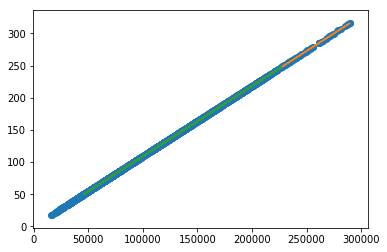

In [34]:
import matplotlib.pyplot as plt
plt.plot(y,X_train,)
plt.scatter(y,X_train)

In [35]:
y_pred = regressor.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

mse = mean_squared_error(y_test, y_pred)

rmse = sqrt(mse)

In [36]:
print(rmse)

444.03847015141685


In [37]:
regressor.score(X_train,y_train)

0.4583924757056944

In [38]:

regressor.score(X_test,y_test)

0.4925377894519196